code crypto memakai dataset dari API websie coingecko dan menggunakan metode linear regression

In [1]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Mendapatkan data dari CoinGecko API
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30'
response = requests.get(url)
data = response.json()

In [3]:
# Mengonversi data ke DataFrame
prices = data['prices']
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [4]:
# Menyiapkan data untuk model
df['timestamp'] = df['timestamp'].map(pd.Timestamp.timestamp)
X = df['timestamp'].values.reshape(-1, 1)
y = df['price'].values

In [5]:
# Membagi data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Memprediksi harga
y_pred = model.predict(X_test)

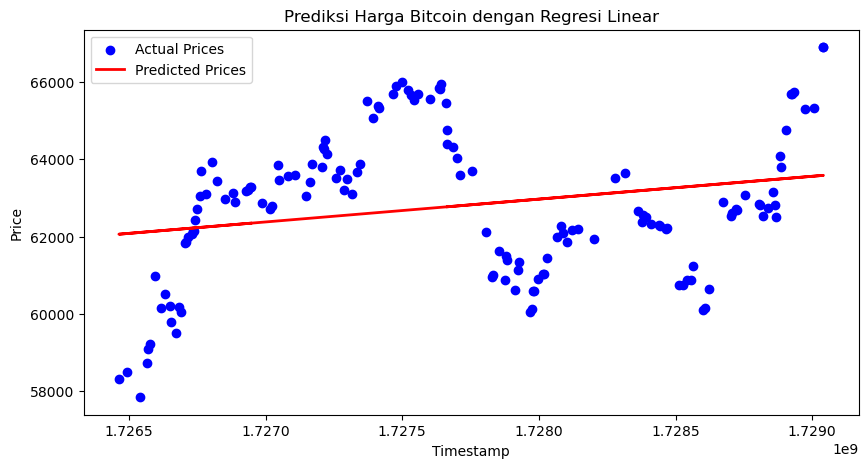

In [8]:
# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Prediksi Harga Bitcoin dengan Regresi Linear')
plt.legend()
plt.show()